<a href="https://colab.research.google.com/github/ibader85/PredictiveAnalytics/blob/main/08_Module_4_Naive_Bayes_Using_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

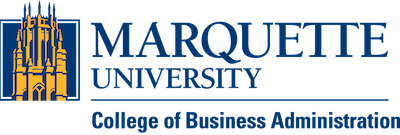

# BUAN 3065: Unlocking Business Insights with Predictive Analytics
# Module 4 Naive Bayes Exercise Using R

Instructor: Dr. Badar Al Lawati

In [1]:
# Import Census file into myData Data Frame

# Install if not already installed
install.packages("readxl")

# Load package
library(readxl)

# Import a specific sheet by name
myData <- read_excel("/content/Census.xlsx", sheet = "Census_Data")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# Install and load all needed packages

install.packages("caret")
install.packages("klaR")
install.packages("gains")
install.packages("pROC")

library(caret)
library(klaR)
library(gains)
library(pROC)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘R.cache’, ‘styler’, ‘classInt’, ‘labelled’, ‘combinat’, ‘questionr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Loading required package: lattice

Loading required package: MASS

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are

In [3]:
# We use the as.factor command to convert the poverty variable into a categorical type

myData$Poverty <- as.factor(myData$Poverty)

In [4]:
# We use the createDataPartition function to partition the data into training (60%) and validation (40%)

set.seed(1)
myIndex <- createDataPartition(myData$Poverty, p=0.6, list = FALSE)
trainSet <- myData[myIndex,]
validationSet <- myData[-myIndex,]

In [7]:
# We use the trainControl function to specify a 10-fold crossvalidation
# process. On the training data set, we use the train
# function and set the method option equal to “nb”, which stands
# for naïve Bayes. The Poverty variable is identified as the target
# variable

myCtrl <- trainControl(method='cv', number=10)
set.seed(1)
nb_fit <- train(Poverty ~., data = trainSet, method = "nb", trControl=myCtrl)
nb_fit

Naive Bayes 

5989 samples
   5 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 5391, 5390, 5390, 5390, 5389, 5391, ... 
Resampling results across tuning parameters:

  usekernel  Accuracy   Kappa    
  FALSE      0.7587301  0.3996777
   TRUE      0.7654146  0.4220285

Tuning parameter 'fL' was held constant at a value of 0
Tuning
 parameter 'adjust' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were fL = 0, usekernel = TRUE and adjust
 = 1.

In [8]:
# We use the predict and confusionMatrix functions to assess the
# model’s performance on the validation data set and produce a
# confusion matrix

nb_class <- predict(nb_fit, newdata = validationSet)
confusionMatrix(nb_class, validationSet$Poverty, positive = '1')

# Note that in the confusionMatrix statement, we specify the value
# “1” in the poverty variable as the positive (also called target or
# success) class

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0  648  734
         1  228 2381
                                          
               Accuracy : 0.759           
                 95% CI : (0.7454, 0.7722)
    No Information Rate : 0.7805          
    P-Value [Acc > NIR] : 0.9995          
                                          
                  Kappa : 0.4174          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.7644          
            Specificity : 0.7397          
         Pos Pred Value : 0.9126          
         Neg Pred Value : 0.4689          
             Prevalence : 0.7805          
         Detection Rate : 0.5966          
   Detection Prevalence : 0.6537          
      Balanced Accuracy : 0.7520          
                                          
       'Positive' Class : 1               
                        

In [9]:
# We can also use other cutoff values, instead of the default value of
# 0.5, to create the confusion matrix. For example, use the
# following commands to specify a cutoff value of 0.75

nb_class_prob <- predict(nb_fit, newdata=validationSet, type= 'prob')
confusionMatrix(as.factor(ifelse(nb_class_prob[,2]>0.75, '1', '0')), validationSet$Poverty, positive = '1')

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0  764  955
         1  112 2160
                                          
               Accuracy : 0.7326          
                 95% CI : (0.7186, 0.7463)
    No Information Rate : 0.7805          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.4202          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.6934          
            Specificity : 0.8721          
         Pos Pred Value : 0.9507          
         Neg Pred Value : 0.4444          
             Prevalence : 0.7805          
         Detection Rate : 0.5412          
   Detection Prevalence : 0.5693          
      Balanced Accuracy : 0.7828          
                                          
       'Positive' Class : 1               
                        

To create the two lift charts and ROC curve, we first need to compute a cumulative gains table by using the predict and gains functions

Note that the Poverty variable was converted into a
categorical type earlier

The gains function requires the variable to be converted back to a numerical type

In [10]:
nb_class_prob <- predict(nb_fit, newdata=validationSet, type='prob')
validationSet$Poverty <- as.numeric(as.character (validationSet$Poverty))
gains_table <- gains(validationSet$Poverty, nb_class_prob[,2])
gains_table

Depth                            Cume   Cume Pct                     Mean
 of           Cume     Mean      Mean   of Total    Lift   Cume     Model
File     N      N      Resp      Resp      Resp    Index   Lift     Score
-------------------------------------------------------------------------
  13   514    514      1.00      1.00      16.5%     128    128      1.00
  20   286    800      1.00      1.00      25.6%     128    128      0.99
  30   404   1204      0.97      0.99      38.2%     125    127      0.98
  42   454   1658      0.95      0.98      52.1%     122    125      0.95
  50   349   2007      0.93      0.97      62.5%     119    124      0.91
  63   494   2501      0.76      0.93      74.6%      98    119      0.74
  73   398   2899      0.63      0.89      82.6%      80    114      0.46
  83   424   3323      0.64      0.86      91.3%      82    110      0.38
  94   440   3763      0.41      0.80      97.1%      53    103      0.23
 100   228   3991      0.39      0.78 

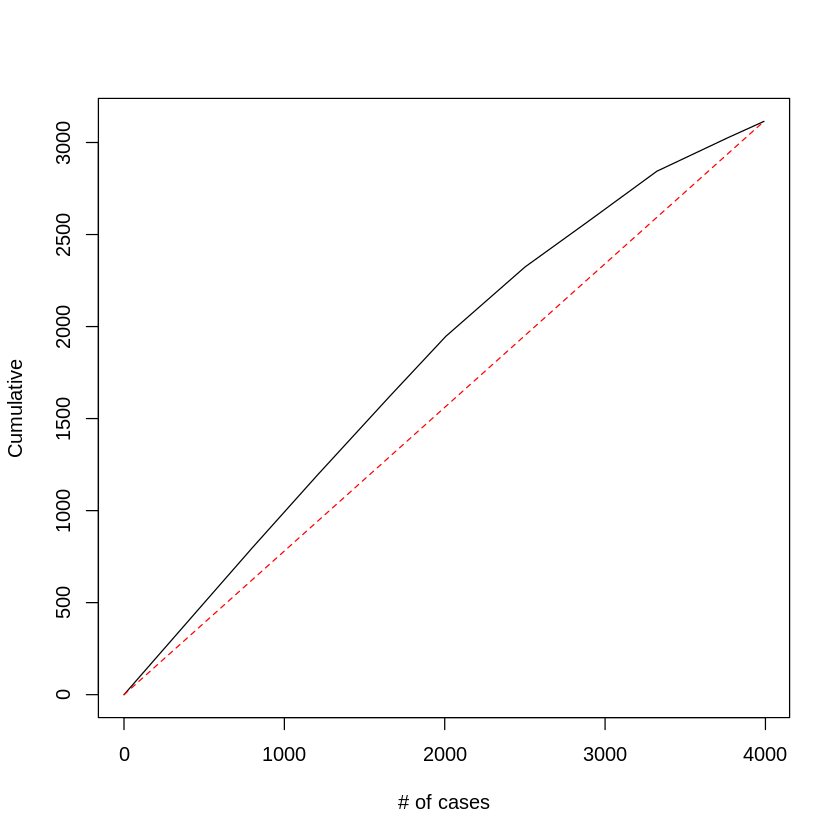

In [15]:
# We use the plot and line functions to create the cumulative lift chart

plot(c(0, gains_table$cume.obs),
     c(0, gains_table$cume.pct.of.total * sum(validationSet$Poverty)),
     xlab = "# of cases", ylab = "Cumulative",
     type = "l")

lines(c(0, nrow(validationSet)),
      c(0, sum(validationSet$Poverty)),
      col = "red", lty = 2)

The lift curve lies above the diagonal line, suggesting that the naïve Bayes model performs better than the baseline model

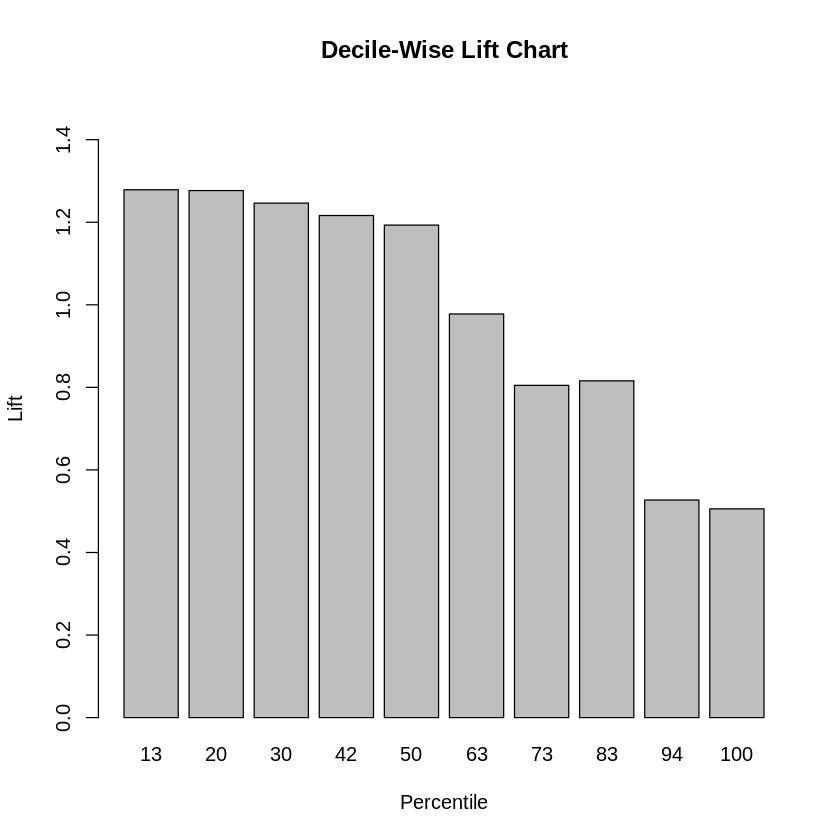

In [18]:
# We use the barplot function to create the decile-wise chart

barplot(gains_table$mean.resp/mean(validationSet$Poverty),
names.arg=gains_table$depth, xlab="Percentile", ylab="
Lift", ylim = c(0,1.5), main = "Decile-Wise Lift Chart")

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.8439

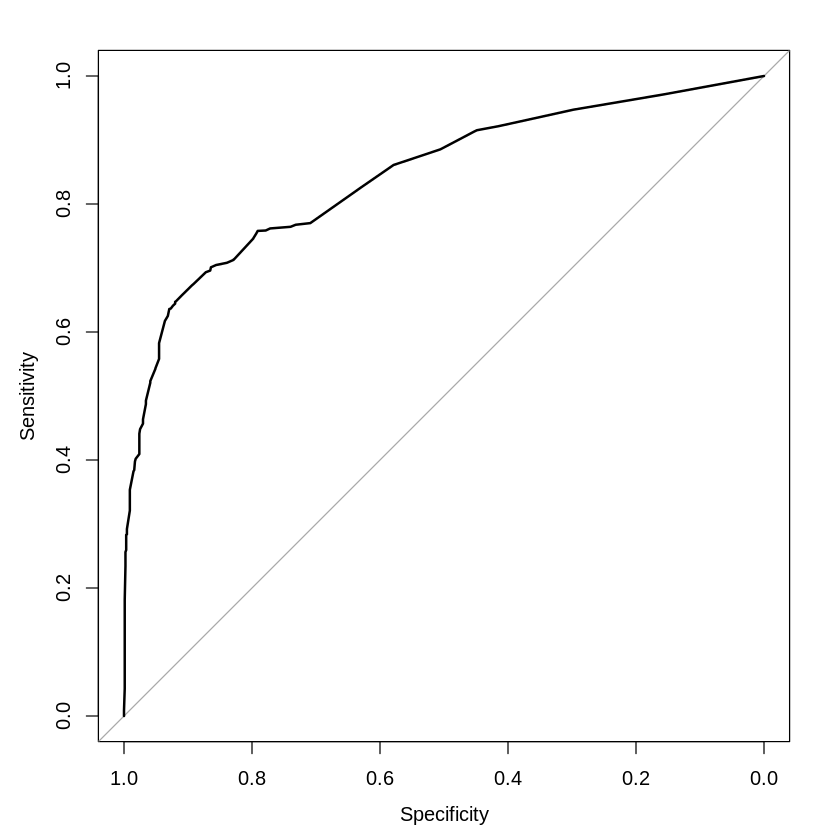

In [20]:
# We use the roc, plot.roc, and auc functions to create the ROC
# curve and compute the area under the curve

roc_object <- roc(validationSet$Poverty, nb_class_prob[,2])
plot.roc(roc_object)
auc(roc_object)

The area under the ROC curve, or AUC, is 0.8437, indicating that the naïve Bayes model performs well in predicting whether an individual is in poverty or not

In [22]:
# We then use the predict function to score the 66
# new records and append the classification results back to the
# original data

myScoreData <- read_excel("/content/Census.xlsx", sheet = "Census_Score")
nb_class_score <- predict(nb_fit, newdata = myScoreData)
myScoreData <- data.frame(myScoreData, nb_class_score)

In [24]:
head(myScoreData)

,Married,Female,White,Age,Edu,nb_class_score
,<chr>,<chr>,<chr>,<dbl>,<chr>,<fct>
1,N,Y,Y,5,N,1
2,N,Y,Y,5,N,1
3,N,Y,N,5,Y,1
4,N,Y,Y,5,N,1
5,N,Y,Y,3,Y,1
6,N,Y,Y,3,N,1
